Create an ipython notebook to provide a tutorial showing the steps to use a clustering algorithm from one of the following:
http://scikit-learn.org/stable/modules/clustering.html

or 

asscociation rules algorithm from:

https://github.com/asaini/Apriori

or

http://aimotion.blogspot.com/2013/01/machine-learning-and-data-mining.html

Your tutorial will  include

1. a short description of what the algorithm is used for ( and of the code to be used )

2. Data setup

3. Algorithm run

4. Display in graph and plots

5. Discussion of the images in the graphs and plots

6. Bibliography ( urls and names of pages and authors of used code and descriptions )

### Analysis using K-means clustering algorithm

K-means clustering algorithm divides the data into k disjoint clusters. In a k-means clustering algorithm, k intial centroids were chosen and each point is then assigned to the closest centroid. The collection of points that are closer to the centroid forms a cluster.



In [2]:
import pandas as pa
import matplotlib.pyplot as plt
file_data=pa.read_csv('./data/data1.csv ', sep='\t', header=0,)
print file_data

     diagnosis         id  radius_mean  texture_mean  perimeter_mean  \
0            1       8670       17.990         10.38          122.80   
1            1       8913       20.570         17.77          132.90   
2            1       8915       19.690         21.25          130.00   
3            1       9047       11.420         20.38           77.58   
4            1      85715       20.290         14.34          135.10   
5            1      86208       12.450         15.70           82.57   
6            1      86211       18.250         19.98          119.60   
7            1      86355       13.710         20.83           90.20   
8            1      86408       13.000         21.82           87.50   
9            1      86409       12.460         24.04           83.97   
10           1      86517       16.020         23.24          102.70   
11           1      86561       15.780         17.89          103.60   
12           1      87106       19.170         24.80          13

In [3]:
file_data.iloc[:10]

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,8670,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,8913,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,8915,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,9047,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,85715,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,86208,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,86211,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,86355,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,86408,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,86409,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

In [5]:
bc = datasets.load_breast_cancer()

In [6]:
df = pd.DataFrame(bc.data,columns=bc.feature_names)

In [21]:
print df.shape
pd.set_option('max_columns', len(df.columns))
df.head(2)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
ss = StandardScaler() # we instantiate it as a matter of good practice
data_scaled = ss.fit_transform(df)

In [11]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [12]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print centroids[0]
print labels[0:10]

[ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
  1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
  0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
  0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
  0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]
[0 0 0 0 0 0 0 0 0 0]


In [13]:
metrics.accuracy_score(bc.target, labels)

0.91036906854130051

In [14]:
print metrics.classification_report(bc.target, labels)

             precision    recall  f1-score   support

          0       0.93      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



 ## Silhouette Score
 
The silhouette score (or coefficient) of a data point measures of how similar it is to its own cluster (cohesion) compared its neighbouring clusters (separation). Its value ranges from -1 to 1, with higher values indicating that the data point matches well to its own cluster and not to its neighbouring clusters, and vice versa. The score of a cluster is the average of the score of all its constituent points, and the overall score is the average of all the clusters' scores. The score can be calculated using any distance metric, such as the Euclidean distance (L2), the Manhattan distance (L1), and the Minkowski distance generalised to n-dimensions.
If the overall silhouette score is high, then the clustering is judged to have been done successfully. On the other hand, a low value may indicate that there too many or too few clusters, which in the case of KMeans would mean adjusting the value of k. However, it might also be the distribution of the data points itself that makes it unsuited for KMeans clustering. Alternative clustering algorithms such as DBSCAN and Hierarchical clustering may be more appropriate. The key is to understand the underlying structure of our data, and visualisation is essential to help us develop a clearer picture.

In [15]:

print "The Silhouette score for k=2 is:",metrics.silhouette_score(data_scaled,labels)

The Silhouette score for k=2 is: 0.344974005103


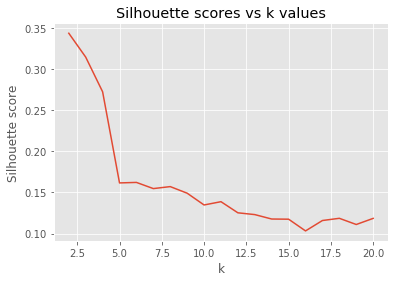

In [16]:
silhouette_scores = [None,None]
for i in range(2,21):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    labels_ = kmeans.labels_
    score = metrics.silhouette_score(data_scaled, labels_)
    silhouette_scores.append(score)
plt.plot(silhouette_scores)
plt.title("Silhouette scores vs k values")
plt.ylabel("Silhouette score")
plt.xlabel("k")
plt.show()

### Comparing cluster lables

Now let's visualise the differences between the true labels and what KMeans came up with. We will set the random state for the algorithm to ensure consistency.

In [17]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [18]:
true1 = [True if i==1 else False for i in labels.tolist()]
true0 = [True if i==0 else False for i in labels.tolist()]

In [19]:
true1y = [True if i==1 else False for i in bc.target]
true0y = [True if i==0 else False for i in bc.target]

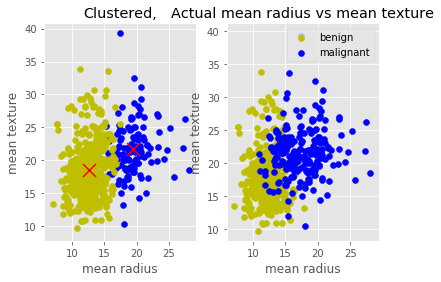

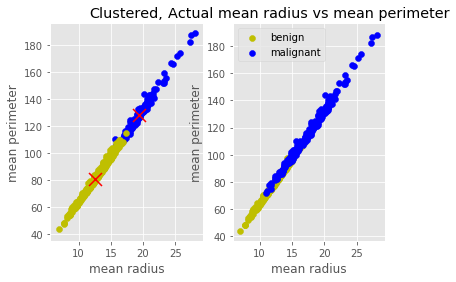

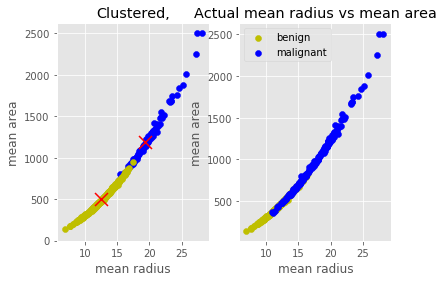

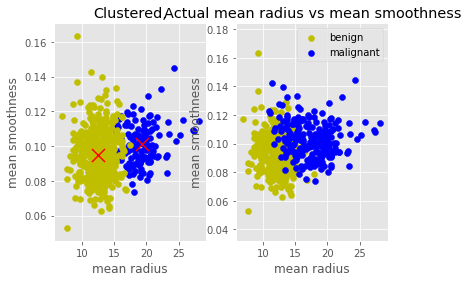

In [20]:
count = 0
for m,i in enumerate(df.columns.tolist()):
    for n,j in enumerate(df.columns.tolist()):
        if i!=j and count <4:
            fig = plt.figure()
            
            ax1 = fig.add_subplot(121)
            ax1.scatter(df[true1][i],df[true1][j], c="b")
            ax1.scatter(df[true0][i],df[true0][j], c="y")
            ax1.scatter(centroids[:, m], centroids[:, n],
                        marker='x', s=169, linewidths=3,
                        color='r', zorder=10)
            title1 = "Clustered,"
            ax1.set_title(title1)
            ax1.set_xlabel(i)
            ax1.set_ylabel(j)
            
            ax2 = fig.add_subplot(122)
            ax2.scatter(df[true1y][i],df[true1y][j], c="y")
            ax2.scatter(df[true0y][i],df[true0y][j], c="b")
            title2 = "Actual "+ i + " vs " + j
            ax2.set_title(title2)
            ax2.set_xlabel(i)
            ax2.set_ylabel(j)

            plt.legend(['benign','malignant'])
            plt.show()
            count += 1